In [47]:
from generator_utils import generate_demand, generate_innovations, generate_phi, generate_theta, generate_sigma_U, simulate_arma22
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
dimensions = 9

"""
generate the covariance matrix for the innovations U
- diagonal: increasing the scale_diagonal increases the variance of the innovations --> more volatile
- off-diagonal: increasing the scale_off_diagonal increases the correlation between the innovations --> more synchronized
"""
sigma_U = generate_sigma_U(num_dimensions=dimensions, scale_diagonal=0.05, scale_off_diagonal=0.05)

"""
Set up the AutoRegressive coefficents (AR) 

Influence: How much past values of the time series affect the current value.
- decrease: make data more random / unpredictable
- increase: make data more predictable
"""
Phi1, Phi2 = generate_phi(num_dimensions=dimensions, factor=1)
print(Phi1, Phi2)

"""
Set up the Moving Average coefficients (MA)

Influence: How much past error terms (unexpected shocks) affect the current value.
- increse: make data more dependent on past shocks/errors, make data more volatile
- decrease: less sensitve to shocks
"""
Theta1, Theta2 = generate_theta(num_dimensions=dimensions, factor=1)

# define the number of periods to simulate
n_periods = 1000000
# simulate the ARMA process
X = simulate_arma22(n_periods=n_periods, Phi1=Phi1, Phi2=Phi2, Theta1=Theta1, Theta2=Theta2, sigma_U=sigma_U, num_dimensions=dimensions)

# generate the demand
Y = generate_demand(X=X[:,:3], n_periods=n_periods)



[[ 5.00000000e-01 -9.00000000e-01  0.00000000e+00  1.37110362e-03
   1.19641183e-02 -1.76539202e-03  7.19149053e-05  1.59417222e-02
  -2.00591387e-02]
 [ 1.10000000e+00 -7.00000000e-01  0.00000000e+00 -4.57853619e-03
   6.68581715e-03  6.18382028e-03  2.47121226e-03  1.68151084e-02
  -2.00454335e-03]
 [ 0.00000000e+00  0.00000000e+00  5.00000000e-01 -5.40286596e-03
  -4.78568947e-03 -4.82825089e-03 -7.50225598e-03  9.11607526e-03
  -2.65421335e-03]
 [-1.51931760e-02  1.23463906e-03  1.03181079e-02  2.63776266e-03
   1.08193746e-02  5.80387580e-03  1.77286756e-02 -1.71360827e-02
   1.07524966e-02]
 [-9.89283985e-04  8.63544536e-03 -3.75238980e-03  2.77094054e-03
   1.59626518e-02 -3.85676323e-02  5.42524376e-03 -3.67765098e-03
  -3.15860931e-03]
 [ 4.58955321e-03  7.73742401e-03  6.67858745e-03  1.17373211e-02
   1.63550031e-02 -1.82120049e-04  5.98945311e-04 -1.41080542e-02
  -5.69745489e-03]
 [-4.77083786e-03 -7.67271298e-03  1.18606671e-02  7.63301659e-03
   9.62433283e-04 -1.8363911

In [49]:
print(X.shape, Y.shape)

df_target = pd.DataFrame(Y, columns=['Demand1', 'Demand2', 'Demand3'])
df_features = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9'])

variance_target = df_target.var()
print(variance_target)



(1000000, 9) (1000000, 3)
Demand1    9.908088
Demand2    7.929674
Demand3    9.223221
dtype: float64


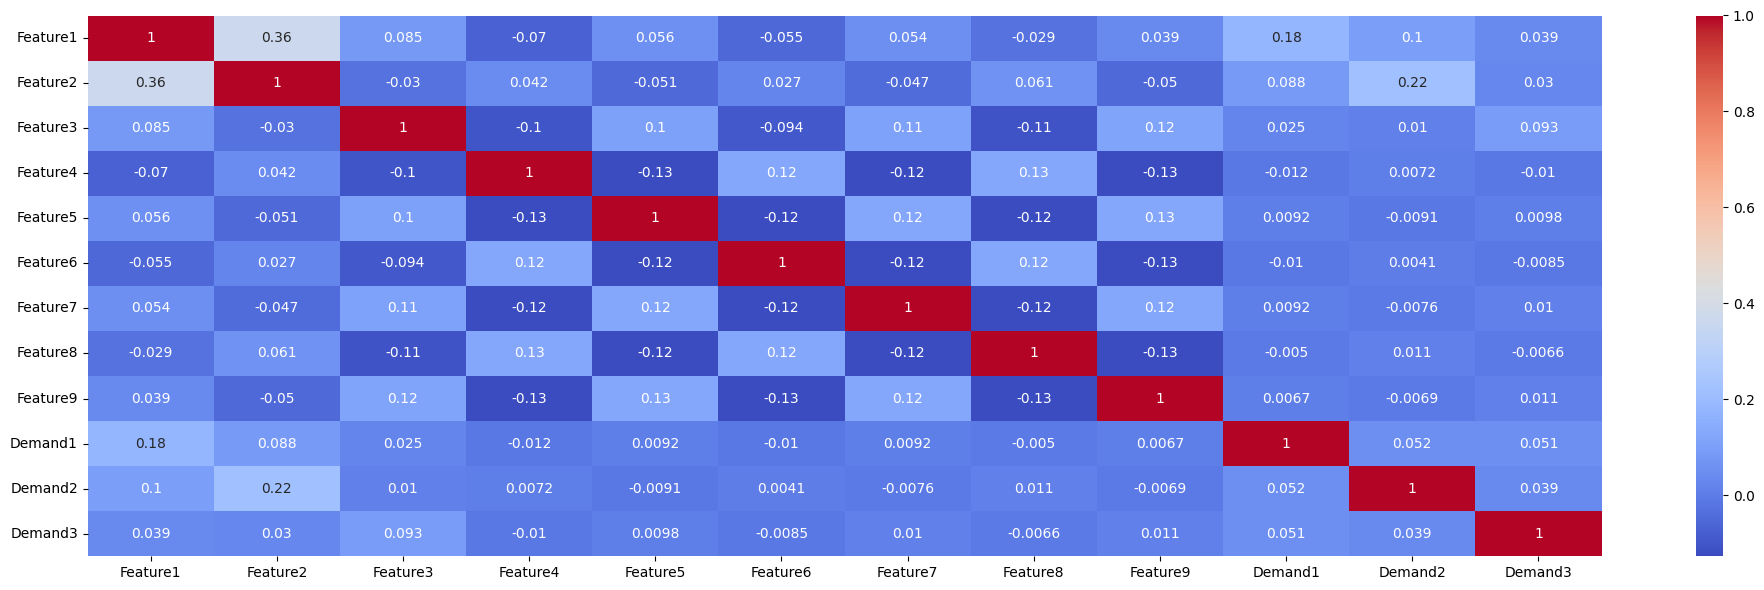

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_features is your DataFrame with features and df_demands is your DataFrame with demands
df1 = pd.concat([df_features, df_target], axis=1)


plt.figure(figsize=(20, 6))

# Plot the correlation heatmap for the combined dataframe
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()